In [2]:
import qiskit
import qiskit_ibm_runtime

HELLO WORLD PLAYLIST

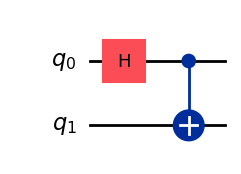

In [3]:
from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt

# Create a Quantum cicruit with 2 qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to qubit 0
qc.h(0)

# Apply a controlled X-gate on qubit 1, controlled by qubit 0
qc.cx(0,1)

qc.draw('mpl')


DIEGO'S DOUBLE SLIT EXPERIMENT

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

simulator = AerSimulator()

In [5]:
# Define a constant and a parameter
pi = np.pi
phi = Parameter('phi')

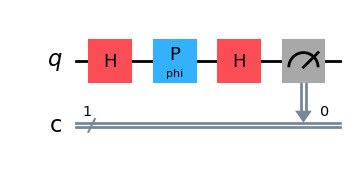

In [6]:
# Create a circuit with 1 quibit and 1 classical bit
qc = QuantumCircuit(1,1)

# Apply a H gate
qc.h(0)

# Apply a Phase gate with a parameter phi to qubit 0
qc.p(phi, 0)

# Apply a H gate
qc.h(0)

# Measure qubit 0 and project onto the classical bit 0
qc.measure(0,0)

qc.draw('mpl')


In [7]:
# Transpile the circuit
qc_trans = transpile(qc, backend=simulator)

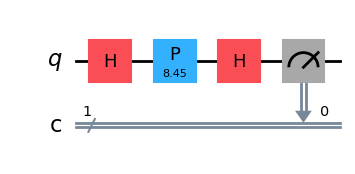

In [8]:
runs = 8192 # Usually a power of 2 
phi_scrn = 6*pi
phi_list = np.random.uniform(-phi_scrn/2, phi_scrn/2, runs) # Randomly select phi values uniformly

circuits = [] # Empty circuits list to append with different phi values 

for phi_val in phi_list: # For loop to feed in the phi values
    qc_sim = qc_trans.assign_parameters({phi: phi_val}) # Assign the phi param
    circuits.append(qc_sim) # Append the circuits list

circuits[3].draw("mpl")

In [9]:
# Run the simulator with a list of circuits, each with 1 shot
job = simulator.run(circuits, shots=1, memory=True)

# Save the results as sim_results
sim_results = job.result()

In [10]:
phi_hit = [] # Empty list to store the results that hit the screen (state 0)

for i, circ in enumerate(circuits):
    result = sim_results.get_memory(circ)[0] # Calls the result of the 0th index of the first circuit 
    if result == '0':
        phi_hit.append(phi_list[i]) # If the result is equalt to 0 (hit the screen), append the corresponding phi_value that hit the screen

In [11]:
# Arbirarily selecting a value for the z coordinate for the screen
z_hit = np.random.uniform(-1, 1, len(phi_hit))

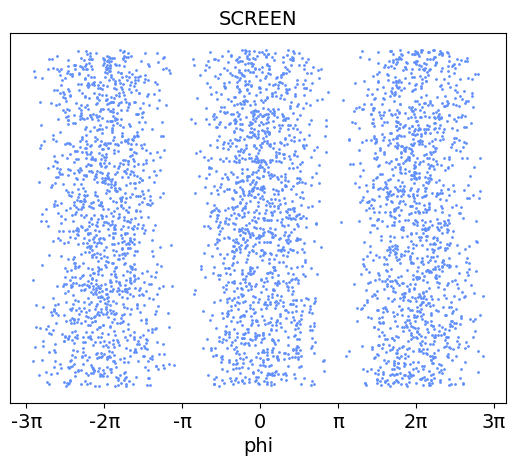

Out of 8192 particles, 4075 particles hit the screen


In [12]:
plt.scatter(phi_hit, z_hit, s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft = False)
plt.xticks(ticks = [-3*pi, -2*pi, -pi, 0, pi, 2*pi, 3*pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'], fontsize=14)
plt.xlabel('phi', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()
print("Out of", runs,"particles,", len(phi_hit), "particles hit the screen")

WATCHED DOUBLE SLIT

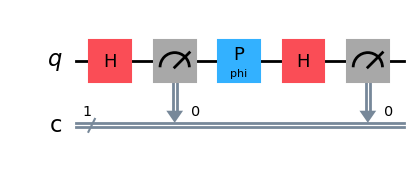

In [13]:
# Create a circuit with 1 quibit and 1 classical bit
qc = QuantumCircuit(1,1)

# Apply a H gate
qc.h(0)

# Measure at the slit
qc.measure(0,0)

# Apply a Phase gate with a parameter phi to qubit 0
qc.p(phi, 0)

# Apply a H gate
qc.h(0)

# Measure qubit 0 and project onto the classical bit 0
qc.measure(0,0)

qc.draw('mpl')


In [14]:
# Transpile the circuit
qc_trans = transpile(qc, backend=simulator)

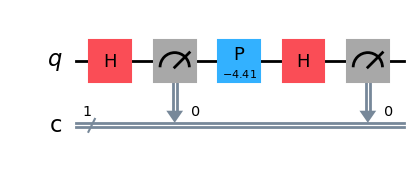

In [18]:
runs = 8192 # Usually a power of 2 
phi_scrn = 6*pi
phi_list = np.random.uniform(-phi_scrn/2, phi_scrn/2, runs) # Randomly select phi values uniformly

circuits = [] # Empty circuits list to append with different phi values 

for phi_val in phi_list: # For loop to feed in the phi values
    qc_sim = qc_trans.assign_parameters({phi: phi_val}) # Assign the phi param
    circuits.append(qc_sim) # Append the circuits list

circuits[3].draw("mpl")

In [16]:
job = simulator.run(circuits, shots=1, memory = True)

phi_hit = []

for i, circ in enumerate(circuits):
    if job.result().get_memory(circ)[0] == '0':
        phi_hit.append(phi_list[i])

print(phi_hit)

[3.009904355760394, -4.803531224418512, -1.898828565109875, -5.4457943663270925, -1.6716264344664056, 6.0627429629015825, 5.181866526793924, 7.902570240355736, 5.497958525315276, 5.960161472498088, 7.202396022413081, -6.491179480442598, 6.9340499683722205, -2.1077182019827614, -0.9578687626548086, 5.8681623837669585, 6.062942623870533, 6.9330027242543375, 0.21616892399467047, 7.269531238840291, 5.259375976536985, 5.7512270575343445, -4.793887948080969, -7.441241623673733, 4.453544419639473, 7.938492111678125, -2.8004389615261256, 8.605166115103463, 4.784089093594337, -8.26809119020565, 4.744923495642069, -0.11986369385801791, 4.835585504360464, 3.635948678976973, 4.943349536383341, -5.8335538723346305, 0.8550006703211621, 6.320768576680431, -2.137290139124476, -5.584911233890443, -1.6720280051473237, 0.18326875106972149, -8.400728451362372, -0.8396478327826645, 7.9748988733293205, 8.686996867962051, -5.171315699599091, -5.556857644189866, -1.2858476485770642, 1.5170535647567993, 6.7303

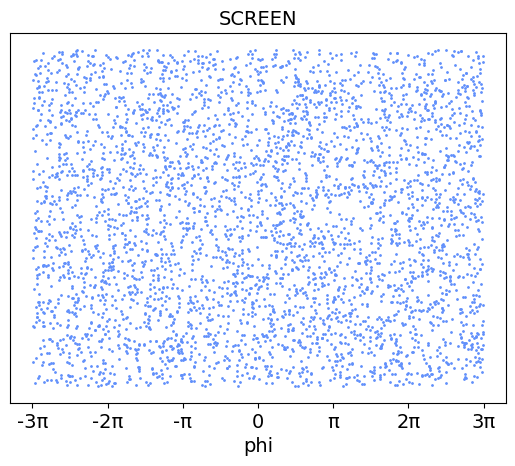

Out of 8192 particles, 4083 particles hit the screen


In [17]:
z_hit = np.random.uniform(-1, 1, len(phi_hit))

plt.scatter(phi_hit, z_hit, s=1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft = False)
plt.xticks(ticks = [-3*pi, -2*pi, -pi, 0, pi, 2*pi, 3*pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'], fontsize=14)
plt.xlabel('phi', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()
print("Out of", runs,"particles,", len(phi_hit), "particles hit the screen")